In [2]:
print('hello world')

hello world


In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [188]:
file_location="/Users/rongyi/Downloads/"
file_name = "Python_project_eda.csv"
my_data=pd.read_csv(file_location+file_name)

In [189]:
my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [4]:
my_data.shape

(566699, 15)

In [5]:
#summary data
my_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [7]:
def mean(x):
    return float(sum(x))/len(x)
np.mean(my_data.spend_usd_next_14_days)

67.80883817484795

In [6]:
def stddev(x):
    m=mean(x)
    return math.pow(sum((i-m)**2 for i in x)/len(x),0.5) # list comprehension

In [7]:
np.std(my_data.spend_usd_next_14_days)

214.09668268368236

In [8]:
def median(x):
    s= sorted(x)
    n = len(x)
    lower_mid = int(math.floor((n-1)/2.))
    upper_mid = int(math.ceil((n-1)/2.))
    return (s[lower_mid],s[super_mid])
a= np.nanmedian(my_data.spend_usd_next_14_days)
print a 

15.828656


In [9]:
def quantile_range(q,x):
    s = sorted(x)
    n = len(x)
    upper_d = int(math.ceil(q*(n+1)))
    lower_d = int(math.floor(q*(n+1)))
    if upper_d == 0:upper_d =1
    if upper_d == n+1: upper_d = n
    if lower_d == 0: lower_d = 1
    if lower_d == n+1: lower_d = n
    return (S[lower_d-1],S[upper_d-1])                  

In [10]:
# for convinience, remove nan value
spend_usd_next_14_days = my_data.spend_usd_next_14_days
spend_usd_next_14_days = spend_usd_next_14_days.dropna()
#total_spend.fillna(0.0)
spend_usd_next_14_days.describe()

count    89032.000000
mean        67.808838
std        214.097885
min          0.002991
25%          4.990000
50%         15.828656
75%         54.795602
max      22519.570000
Name: spend_usd_next_14_days, dtype: float64

In [14]:
# skewness
stats.skew(spend_usd_next_14_days) # skewness>0 -> right skewed -> mean > median

25.481428896161574

In [15]:
def winsorize_series(s):
    lower = s.quantile(0.05)
    upper = s.quantile(0.95)
    s[s < lower] = lower
    s[s > upper] = upper
    return s

my_series = pd.Series(spend_usd_next_14_days)

result = winsorize_series(my_series)
result.describe()

count    89032.000000
mean        49.806191
std         76.009381
min          1.026880
25%          4.990000
50%         15.828656
75%         54.795602
max        289.344500
Name: spend_usd_next_14_days, dtype: float64

In [18]:
file_location="/Users/rongyi/Downloads/"
file_name = "Python_project_experiment.csv"
my_data2=pd.read_csv(file_location+file_name)

In [20]:
my_data2.head()

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
0,NaN,NaN,12624549,,0.0,3,16554430871838092438,NaN
1,NaN,NaN,12624548,,0.0,14,14411542309984779713,NaN
2,NaN,NaN,12624549,,0.0,20,8425202140671508556,NaN
3,NaN,NaN,12624549,,0.0,16,11302731652742770675,NaN
4,NaN,NaN,12624549,,0.0,14,1399243101040681867,NaN


In [22]:
my_series.count()

89032

0                NaN
1                NaN
2                NaN
3           7.398815
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14         33.820000
15               NaN
16               NaN
17          1.980000
18        396.437891
19               NaN
20               NaN
21               NaN
22               NaN
23               NaN
24          7.619224
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
             ...    
566669           NaN
566670           NaN
566671           NaN
566672           NaN
566673           NaN
566674           NaN
566675           NaN
566676           NaN
566677    258.782050
566678           NaN
566679           NaN
566680           NaN
566681     44.419776
566682           NaN
566683      2.156373
566684           NaN
566685       

In [26]:
sum(my_series)/my_series.count()

49.806191066820524

In [27]:
my_series.head()

3       7.398815
14     33.820000
17      1.980000
18    289.344500
24      7.619224
Name: spend_usd_next_14_days, dtype: float64

In [28]:
spend_usd_next_14_days.head()

3       7.398815
14     33.820000
17      1.980000
18    289.344500
24      7.619224
Name: spend_usd_next_14_days, dtype: float64

In [29]:
new_data = my_data[['spend_usd_next_14_days','user_added_credit_card','user_added_dcb','user_added_fop','user_added_gift_card','user_added_paypal']]

In [30]:
new_data.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal
0,NaN,NaN,NaN,0,NaN,NaN
1,NaN,NaN,NaN,0,NaN,NaN
2,NaN,NaN,NaN,0,NaN,NaN
3,7.398815,1.0,0.0,1,0.0,0.0
4,NaN,0.0,1.0,1,0.0,0.0


In [31]:
new_data.dropna()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal
3,7.398815,1.0,0.0,1,0.0,0.0
14,33.820000,1.0,1.0,1,0.0,1.0
17,1.980000,1.0,0.0,1,1.0,0.0
18,396.437891,1.0,1.0,1,0.0,0.0
24,7.619224,0.0,1.0,1,0.0,0.0
30,33.369935,1.0,1.0,1,0.0,0.0
38,152.073428,1.0,0.0,1,0.0,0.0
41,14.414418,0.0,1.0,1,0.0,0.0
51,71.820000,1.0,0.0,1,0.0,0.0
53,28.890000,1.0,0.0,1,0.0,0.0


In [32]:
new_data=new_data.dropna()

In [33]:
new_data.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal
3,7.398815,1.0,0.0,1,0.0,0.0
14,33.820000,1.0,1.0,1,0.0,1.0
17,1.980000,1.0,0.0,1,1.0,0.0
18,396.437891,1.0,1.0,1,0.0,0.0
24,7.619224,0.0,1.0,1,0.0,0.0


In [34]:
my_series[0]

KeyError: 0

In [35]:
new_data['spend_usd_next_14_days'==0]

KeyError: False

In [36]:
new_data['spend_usd_next_14_days']==0

3         False
14        False
17        False
18        False
24        False
30        False
38        False
41        False
51        False
53        False
54        False
56        False
63        False
64        False
84        False
85        False
106       False
119       False
121       False
134       False
142       False
147       False
173       False
174       False
178       False
181       False
186       False
199       False
204       False
206       False
          ...  
566528    False
566531    False
566535    False
566538    False
566542    False
566545    False
566560    False
566567    False
566568    False
566569    False
566575    False
566581    False
566584    False
566585    False
566593    False
566600    False
566601    False
566608    False
566609    False
566613    False
566625    False
566635    False
566641    False
566643    False
566650    False
566662    False
566677    False
566681    False
566683    False
566693    False
Name: spend_usd_next_14_

In [37]:
new = my_data[['spend_usd_next_14_days','user_added_credit_card','user_added_dcb','user_added_fop','user_added_gift_card','user_added_paypal']]

In [38]:
new['spend_usd_next_14_days']>0

0         False
1         False
2         False
3          True
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14         True
15        False
16        False
17         True
18         True
19        False
20        False
21        False
22        False
23        False
24         True
25        False
26        False
27        False
28        False
29        False
          ...  
566669    False
566670    False
566671    False
566672    False
566673    False
566674    False
566675    False
566676    False
566677     True
566678    False
566679    False
566680    False
566681     True
566682    False
566683     True
566684    False
566685    False
566686    False
566687    False
566688    False
566689    False
566690    False
566691    False
566692    False
566693     True
566694    False
566695    False
566696    False
566697    False
566698    False
Name: spend_usd_next_14_

In [39]:
A = new['spend_usd_next_14_days']>0

In [40]:
sum(A)

89032

In [41]:
sum(A)/A.count()

0

In [42]:
A.count()

566699

In [43]:
sum(A)/(A.count())

0

In [44]:
89032/566699

0

In [45]:
float(sum(A))/float(A.count())

0.15710632981529876

In [46]:
new.assign('SpendOrNot'=new["spend_usd_next_14_days"]>0)

SyntaxError: keyword can't be an expression (<ipython-input-46-e1ba35b286d5>, line 1)

In [47]:
new['SpendOrNot']=new["spend_usd_next_14_days"]>0

/Users/rongyi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
new.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,SpendOrNot
0,NaN,NaN,NaN,0,NaN,NaN,False
1,NaN,NaN,NaN,0,NaN,NaN,False
2,NaN,NaN,NaN,0,NaN,NaN,False
3,7.398815,1.0,0.0,1,0.0,0.0,True
4,NaN,0.0,1.0,1,0.0,0.0,False


In [49]:
def conversion_rate(method):

SyntaxError: unexpected EOF while parsing (<ipython-input-49-af6f65fff4a2>, line 1)

In [50]:
new_cc=new["user_added_credit_card"==1]

KeyError: False

In [51]:
new_cc=new["user_added_credit_card"]==1

In [52]:
new_cc.head()

0    False
1    False
2    False
3     True
4    False
Name: user_added_credit_card, dtype: bool

In [53]:
new_cc=new[new.user_added_credit_card==1]

In [54]:
new.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,SpendOrNot
0,NaN,NaN,NaN,0,NaN,NaN,False
1,NaN,NaN,NaN,0,NaN,NaN,False
2,NaN,NaN,NaN,0,NaN,NaN,False
3,7.398815,1.0,0.0,1,0.0,0.0,True
4,NaN,0.0,1.0,1,0.0,0.0,False


In [56]:
conversion_rate_cc = float(sum(new_cc.SpendOrNot))/float(new_cc.SpendOrNot.count())

In [57]:
conversion_rate_cc

0.5461520377850442

In [58]:
sum(new_cc.SpendOrNot)

51110

In [59]:
new_cc.SpendOrNot.count()

93582

In [60]:
new_cc=new[new.user_added_credit_card==1&new.user_added_dcb<1&new.user_added_gift_card<1&new.user_added_paypal<1]

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [61]:
new_cc=new[(new.user_added_credit_card==1)&(new.user_added_dcb<1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)]

In [62]:
sum(new_cc[SpendOrNot])

NameError: name 'SpendOrNot' is not defined

In [63]:
sum(new_cc['SpendOrNot'])

25841

In [64]:
new_cc['SpendOrNot'].count()

57774

In [65]:
new_cc.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,SpendOrNot
3,7.398815,1.0,0.0,1,0.0,0.0,True
27,NaN,1.0,0.0,1,0.0,0.0,False
38,152.073428,1.0,0.0,1,0.0,0.0,True
51,71.820000,1.0,0.0,1,0.0,0.0,True
53,28.890000,1.0,0.0,1,0.0,0.0,True


In [66]:
sum(new_data['user_added_credit_card'])

51110.0

In [67]:
new_data['user_added_credit_card'].count()

84787

In [68]:
new_data.count()

spend_usd_next_14_days    84787
user_added_credit_card    84787
user_added_dcb            84787
user_added_fop            84787
user_added_gift_card      84787
user_added_paypal         84787
dtype: int64

In [69]:
51110.0/566699.0

0.09018897157044568

In [70]:
new_cc=new_data[new.user_added_credit_card==1&new.user_added_dcb<1&new.user_added_gift_card<1&new.user_added_paypal<1]

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [71]:
new_cc=new_data[(new_data.user_added_credit_card==1)&(new_data.user_added_dcb<1)&(new_data.user_added_gift_card<1)&(new_data.user_added_paypal<1)]

In [72]:
new_cc.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal
3,7.398815,1.0,0.0,1,0.0,0.0
38,152.073428,1.0,0.0,1,0.0,0.0
51,71.820000,1.0,0.0,1,0.0,0.0
53,28.890000,1.0,0.0,1,0.0,0.0
56,12.746660,1.0,0.0,1,0.0,0.0


In [73]:
new_cc.shape()

TypeError: 'tuple' object is not callable

In [74]:
new_cc.shape

(25841, 6)

In [75]:
25841.0/566699.0

0.04559916287129499

In [76]:
new_cc = new_data[new_data.user_added_credit_card==1]

In [78]:
new_cc.shape

(51110, 6)

In [79]:
51110.0/566699.0

0.09018897157044568

In [80]:
my_series.shape

(89032,)

In [81]:
cc = my_data[(my_data.user_added_credit_card==1)&(my_data.spend_usd_next_14_days>0)]

In [82]:
cc.shape

(51110, 15)

In [83]:
my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [84]:
sum(my_data['spend_usd_next_14_days']>0)

89032

In [85]:
my_data.shape

(566699, 15)

In [86]:
89032/566699

0

In [87]:
sum(my_data.user_added_credit_card>0)

93582

In [88]:
cc

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
14,0,1.0,US,1,True,1.0,1.0,33.820000,1.0,1.0,1,0.0,1.0,10301202680834406137,1
17,1,1.0,US,1,True,1.0,1.0,1.980000,1.0,0.0,1,1.0,0.0,16569805868309262813,1
18,6,1.0,TW,1,True,1.0,1.0,396.437891,1.0,1.0,1,0.0,0.0,3527511706399575968,1
30,6,1.0,KR,1,True,1.0,1.0,33.369935,1.0,1.0,1,0.0,0.0,9965952585900342987,1
38,8,1.0,GB,1,True,1.0,1.0,152.073428,1.0,0.0,1,0.0,0.0,13242712546148655678,1
51,8,1.0,US,1,True,1.0,1.0,71.820000,1.0,0.0,1,0.0,0.0,4756932245224773331,1
53,4,1.0,US,1,True,1.0,1.0,28.890000,1.0,0.0,1,0.0,0.0,1291038910320116563,1
56,1,1.0,KR,1,True,1.0,1.0,12.746660,1.0,0.0,1,0.0,0.0,15530179506338941753,1
63,3,1.0,JP,1,True,1.0,1.0,64.781047,1.0,1.0,1,0.0,0.0,14957191377433497797,1


In [89]:
my_data.user_added_credit_card>0

0         False
1         False
2         False
3          True
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14         True
15        False
16        False
17         True
18         True
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27         True
28        False
29        False
          ...  
566669    False
566670    False
566671    False
566672    False
566673    False
566674    False
566675    False
566676    False
566677     True
566678    False
566679    False
566680    False
566681     True
566682    False
566683    False
566684    False
566685    False
566686    False
566687    False
566688    False
566689    False
566690    False
566691    False
566692    False
566693     True
566694    False
566695    False
566696    False
566697    False
566698    False
Name: user_added_credit_

In [90]:
my_data['user_added_credit_card']>0

0         False
1         False
2         False
3          True
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14         True
15        False
16        False
17         True
18         True
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27         True
28        False
29        False
          ...  
566669    False
566670    False
566671    False
566672    False
566673    False
566674    False
566675    False
566676    False
566677     True
566678    False
566679    False
566680    False
566681     True
566682    False
566683    False
566684    False
566685    False
566686    False
566687    False
566688    False
566689    False
566690    False
566691    False
566692    False
566693     True
566694    False
566695    False
566696    False
566697    False
566698    False
Name: user_added_credit_

In [91]:
cc.shape

(51110, 15)

In [92]:
sum(my_data.user_added_credit_card==1)

93582

In [93]:
cc_my_data = my_data[(my_data.user_added_credit_card==1)&(my_data.spend_usd_next_14_days>0)]

In [94]:
cc_my_data.shape

(51110, 15)

In [95]:
cc_my_data = my_data[(my_data.user_added_credit_card==1)&(my_data.spend_usd_next_14_days!=NaN)]

NameError: name 'NaN' is not defined

In [96]:
cc_my_data = my_data[(my_data.user_added_credit_card==1)&(my_data.spend_usd_next_14_days!='NaN')]

/Users/rongyi/anaconda/lib/python2.7/site-packages/pandas/core/ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [97]:
cc_my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
14,0,1.0,US,1,True,1.0,1.0,33.820000,1.0,1.0,1,0.0,1.0,10301202680834406137,1
17,1,1.0,US,1,True,1.0,1.0,1.980000,1.0,0.0,1,1.0,0.0,16569805868309262813,1
18,6,1.0,TW,1,True,1.0,1.0,396.437891,1.0,1.0,1,0.0,0.0,3527511706399575968,1
30,6,1.0,KR,1,True,1.0,1.0,33.369935,1.0,1.0,1,0.0,0.0,9965952585900342987,1


In [98]:
51110.0/93582.0

0.5461520377850442

In [99]:
new_dcb=new[(new.user_added_credit_card<1)&(new.user_added_dcb==1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)]

In [100]:
new_dcb.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,SpendOrNot
4,NaN,0.0,1.0,1,0.0,0.0,False
6,NaN,0.0,1.0,1,0.0,0.0,False
15,NaN,0.0,1.0,1,0.0,0.0,False
24,7.619224,0.0,1.0,1,0.0,0.0,True
39,NaN,0.0,1.0,1,0.0,0.0,False


In [101]:
sum(new_dcb['SpendOrNot'])

19102

In [102]:
new_dcb.shape

(50880, 7)

In [103]:
new_gc=new[(new.user_added_credit_card<1)&(new.user_added_dcb<1)&(new.user_added_gift_card=1)&(new.user_added_paypal<1)]

SyntaxError: invalid syntax (<ipython-input-103-ae58b1ca5554>, line 1)

In [104]:
new_gc=new[(new.user_added_credit_card<1)&(new.user_added_dcb<1)&(new.user_added_gift_card==1)&(new.user_added_paypal<1)]

In [105]:
sum(new_gc['SpendOrNot'])

4546

In [106]:
new_gc.shape

(10292, 7)

In [107]:
sum(new_cc['SpendOrNot'])

KeyError: 'SpendOrNot'

In [108]:
new_cc.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal
3,7.398815,1.0,0.0,1,0.0,0.0
14,33.820000,1.0,1.0,1,0.0,1.0
17,1.980000,1.0,0.0,1,1.0,0.0
18,396.437891,1.0,1.0,1,0.0,0.0
30,33.369935,1.0,1.0,1,0.0,0.0


In [109]:
new_cc=new[(new.user_added_credit_card==1)&(new.user_added_dcb<1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)]

In [110]:
new_cc.shape

(57774, 7)

In [111]:
sum(new_cc['SpendOrNot'])

25841

In [112]:
new_cc.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,SpendOrNot
3,7.398815,1.0,0.0,1,0.0,0.0,True
27,NaN,1.0,0.0,1,0.0,0.0,False
38,152.073428,1.0,0.0,1,0.0,0.0,True
51,71.820000,1.0,0.0,1,0.0,0.0,True
53,28.890000,1.0,0.0,1,0.0,0.0,True


In [113]:
new_cc = new[new.user_added_credit_card==1]

In [114]:
new_cc.shape

(93582, 7)

In [115]:
sum(new_cc['SpendOrNot'])

51110

In [116]:
new_gc = new[new.user_added_gift_card==1]

In [117]:
new_gc.shape

(31546, 7)

In [118]:
sum(new_gc['SpendOrNot'])

20772

In [119]:
sum(new[user_added_fop])

NameError: name 'user_added_fop' is not defined

In [120]:
sum(new['user_added_fop'])

170597

In [121]:
new.shape

(566699, 7)

In [122]:
new_cc=new[(new.user_added_credit_card==1)&(new.user_added_dcb<1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)&(new.user_added_fop<1)]

In [123]:
new_cc.shape

(0, 7)

In [124]:
new['user_added_fop']!=1

0          True
1          True
2          True
3         False
4         False
5          True
6         False
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14        False
15        False
16         True
17        False
18        False
19         True
20         True
21         True
22         True
23         True
24        False
25         True
26         True
27        False
28         True
29         True
          ...  
566669     True
566670     True
566671     True
566672     True
566673     True
566674     True
566675     True
566676     True
566677    False
566678     True
566679     True
566680    False
566681    False
566682     True
566683    False
566684     True
566685     True
566686     True
566687     True
566688     True
566689     True
566690    False
566691     True
566692     True
566693    False
566694     True
566695     True
566696     True
566697     True
566698     True
Name: user_added_fop, Le

In [190]:
new = my_data[['spend_usd_next_14_days','user_added_credit_card','user_added_dcb','user_added_fop','user_added_gift_card','user_added_paypal','made_purchase_before']]

In [191]:
new = new[new.made_purchase_before<1]

In [127]:
new_cc=new[(new.user_added_credit_card==1)&(new.user_added_dcb<1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)&(new.user_added_fop<1)]

In [128]:
new_cc.shape

(0, 7)

In [184]:
new_cc=new[(new.user_added_credit_card==1)&(new.user_added_dcb<1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)]

In [185]:
new_cc.shape

(21369, 7)

In [186]:
sum(new_cc.spend_usd_next_14_days>0)

2153

In [132]:
new_cc=new[(new.user_added_credit_card<1)&(new.user_added_dcb<1)&(new.user_added_gift_card==1)&(new.user_added_paypal<1)]

In [133]:
new_gc=new[(new.user_added_credit_card<1)&(new.user_added_dcb<1)&(new.user_added_gift_card==1)&(new.user_added_paypal<1)]

In [134]:
new_gc.shape

(3073, 7)

In [135]:
sum(new_gc.spend_usd_next_14_days>0)

470

In [136]:
new_cc=new[(new.user_added_credit_card<1)&(new.user_added_dcb==1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)]

In [137]:
new_cc.shape

(23690, 7)

In [138]:
sum(new_cc.spend_usd_next_14_days>0)

1896

In [139]:
new_cc=new[(new.user_added_credit_card==1)&(new.user_added_dcb<1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)]

In [140]:
new_cc.shape

(21369, 7)

In [141]:
sum(new_cc.spend_usd_next_14_days>0)

2153

In [142]:
new_gc=new[(new.user_added_credit_card<1)&(new.user_added_dcb<1)&(new.user_added_gift_card==1)&(new.user_added_paypal<1)]

In [143]:
new_gc.shape

(3073, 7)

In [144]:
sum(new_gc.spend_usd_next_14_days>0)

470

In [145]:
new_dcb = new[(new.user_added_credit_card<1)&(new.user_added_dcb==1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)]

In [146]:
new_dcb.shape

(23690, 7)

In [147]:
sum(new_dbc.spend_usd_next_14_days>0)

NameError: name 'new_dbc' is not defined

In [148]:
sum(new_dcb.spend_usd_next_14_days>0)

1896

In [149]:
new_paypal = new[(new.user_added_credit_card<1)&(new.user_added_dcb<1)&(new.user_added_gift_card<1)&(new.user_added_paypal==1)]

In [150]:
new_paypal.shape

(2482, 7)

In [151]:
sum(new_paypal.spend_usd_next_14_days>0)

254

In [152]:
new.shape

(390997, 7)

In [153]:
sum(new.spend_usd_next_14_days>0)

8889

In [159]:
cr_cc = float(sum(new_cc.spend_usd_next_14_days>0))/float(new_cc['made_purchase_before'].count())

In [160]:
cr_cc

0.1007534278627919

In [161]:
cr_gc = float(sum(new_gc.spend_usd_next_14_days>0))/float(new_gc['made_purchase_before'].count())

In [162]:
cr_gc

0.15294500488122356

In [163]:
cr_dcb = float(sum(new_dcb.spend_usd_next_14_days>0))/float(new_dcb['made_purchase_before'].count())

In [164]:
cr_paypal = float(sum(new_paypal.spend_usd_next_14_days>0))/float(new_paypal['made_purchase_before'].count())

In [165]:
mto_sum = 8889 - 254-1896-470-2153

In [166]:
mto_count = 390997 - 2482 - 23690 - 3073 - 21369

In [167]:
cr_mto = float(mto_sum)/float(mto_count)

In [168]:
cr_mto

0.012092260776830805

In [170]:
new_mto = new[(new.user_added_credit_card==1)|(new.user_added_dcb==1)|(new.user_added_gift_card==1)|(new.user_added_paypal==1)]

In [171]:
new_mto.shape

(56998, 7)

In [172]:
sum(new_mto.spend_usd_next_14_days>0)

6063

In [173]:
mto_count = 56998-2482 - 23690 - 3073 - 21369

In [174]:
mto_sum = 6063 - 254-1896-470-2153

In [175]:
cr_mto = float(mto_sum)/float(mto_count)

In [176]:
cr_mto

0.20206766917293234

In [177]:
mto_count

6384

In [178]:
mto_sum

1290

In [179]:
head(new_mto)

NameError: name 'head' is not defined

In [180]:
new_mto.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,made_purchase_before
15,NaN,0.0,1.0,1,0.0,0.0,0.0
39,NaN,0.0,1.0,1,0.0,0.0,0.0
43,NaN,0.0,1.0,1,0.0,0.0,0.0
45,NaN,0.0,1.0,1,0.0,0.0,0.0
54,1.083211,0.0,1.0,1,0.0,0.0,0.0


In [181]:
new.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,made_purchase_before
0,NaN,NaN,NaN,0,NaN,NaN,0.0
1,NaN,NaN,NaN,0,NaN,NaN,0.0
5,NaN,NaN,NaN,0,NaN,NaN,0.0
7,NaN,NaN,NaN,0,NaN,NaN,0.0
8,NaN,NaN,NaN,0,NaN,NaN,0.0


In [187]:
new.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,made_purchase_before
0,NaN,NaN,NaN,0,NaN,NaN,0.0
1,NaN,NaN,NaN,0,NaN,NaN,0.0
5,NaN,NaN,NaN,0,NaN,NaN,0.0
7,NaN,NaN,NaN,0,NaN,NaN,0.0
8,NaN,NaN,NaN,0,NaN,NaN,0.0


In [192]:
new.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,made_purchase_before
0,NaN,NaN,NaN,0,NaN,NaN,0.0
1,NaN,NaN,NaN,0,NaN,NaN,0.0
5,NaN,NaN,NaN,0,NaN,NaN,0.0
7,NaN,NaN,NaN,0,NaN,NaN,0.0
8,NaN,NaN,NaN,0,NaN,NaN,0.0


In [193]:
my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [194]:
new_cc

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,made_purchase_before
98,NaN,1.0,0.0,1,0.0,0.0,0.0
184,NaN,1.0,0.0,1,0.0,0.0,0.0
201,NaN,1.0,0.0,1,0.0,0.0,0.0
257,NaN,1.0,0.0,1,0.0,0.0,0.0
258,NaN,1.0,0.0,1,0.0,0.0,0.0
288,NaN,1.0,0.0,1,0.0,0.0,0.0
335,1.447418,1.0,0.0,1,0.0,0.0,0.0
341,NaN,1.0,0.0,1,0.0,0.0,0.0
350,NaN,1.0,0.0,1,0.0,0.0,0.0
506,NaN,1.0,0.0,1,0.0,0.0,0.0


In [195]:
new_cc.head()

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,made_purchase_before
98,NaN,1.0,0.0,1,0.0,0.0,0.0
184,NaN,1.0,0.0,1,0.0,0.0,0.0
201,NaN,1.0,0.0,1,0.0,0.0,0.0
257,NaN,1.0,0.0,1,0.0,0.0,0.0
258,NaN,1.0,0.0,1,0.0,0.0,0.0


In [196]:
new_cc['spend_usd_next_14_days'>0]

KeyError: True

In [197]:
new_mto[new_mto.spend_usd_next_14_days>0]

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,made_purchase_before
54,1.083211,0.0,1.0,1,0.0,0.0,0.0
106,1.127959,0.0,1.0,1,0.0,0.0,0.0
186,9.990000,1.0,0.0,1,1.0,0.0,0.0
274,0.902522,0.0,1.0,1,0.0,0.0,0.0
335,1.447418,1.0,0.0,1,0.0,0.0,0.0
410,29.980000,0.0,0.0,1,1.0,0.0,0.0
469,9.470000,0.0,0.0,1,1.0,0.0,0.0
809,6.503897,0.0,1.0,1,0.0,0.0,0.0
814,3.665506,0.0,1.0,1,0.0,0.0,0.0
906,2.312596,1.0,0.0,1,0.0,0.0,0.0


In [198]:
new_mto

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,made_purchase_before
15,NaN,0.0,1.0,1,0.0,0.0,0.0
39,NaN,0.0,1.0,1,0.0,0.0,0.0
43,NaN,0.0,1.0,1,0.0,0.0,0.0
45,NaN,0.0,1.0,1,0.0,0.0,0.0
54,1.083211,0.0,1.0,1,0.0,0.0,0.0
61,NaN,0.0,1.0,1,0.0,0.0,0.0
74,NaN,0.0,1.0,1,0.0,0.0,0.0
83,NaN,0.0,1.0,1,1.0,0.0,0.0
98,NaN,1.0,0.0,1,0.0,0.0,0.0
106,1.127959,0.0,1.0,1,0.0,0.0,0.0


In [202]:
new_mto = new[new.user_added_credit_card+new.user_added_dcb+new.user_added_gift_card+new.user_added_paypal>1]

In [201]:
type(new.user_added_credit_card)

pandas.core.series.Series

In [203]:
new_mto

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,made_purchase_before
83,NaN,0.0,1.0,1,1.0,0.0,0.0
186,9.990000,1.0,0.0,1,1.0,0.0,0.0
242,NaN,1.0,1.0,1,0.0,1.0,0.0
307,NaN,1.0,0.0,1,0.0,1.0,0.0
439,NaN,1.0,1.0,1,0.0,0.0,0.0
453,NaN,1.0,1.0,1,0.0,0.0,0.0
456,NaN,0.0,1.0,1,0.0,1.0,0.0
494,NaN,0.0,1.0,1,0.0,1.0,0.0
623,NaN,1.0,0.0,1,1.0,0.0,0.0
659,NaN,1.0,0.0,1,0.0,1.0,0.0


In [204]:
sum(new_mto.spend_usd_next_14_days>0)

1290

In [205]:
new_credit = new[new.user_added_credit_card==1]

In [206]:
new_creidt.shape

NameError: name 'new_creidt' is not defined

In [207]:
new_credit.shape

(26718, 7)

In [208]:
sum(new.credit.spend_usd_next_14_days>0)

AttributeError: 'DataFrame' object has no attribute 'credit'

In [209]:
sum(new_credit.spend_usd_next_14_days>0)

3208

In [210]:
new_gift = new[new.user_added_gift_card==1]

In [211]:
new_gift.shape

(5291, 7)

In [212]:
sum(new_gift.spend_usd_next_14_days>0)

1011

In [213]:
cr_mto = float(sum(new_mto.spend_usd_next_14_days>0))/float(new_mto['made_purchase_before'].count())

In [214]:
cr_mto

0.20206766917293234

In [215]:
payment_method = ['credit_card','gift_card','dcb','paypal','more than one']

In [216]:
conversion_rate = [cr_cc,cr_gc,cr_dcb,cr_paypal,cr_mto]

In [217]:
plt.bar(conversion_rate,align = 'center',alpha = 0.5)

TypeError: bar() takes at least 2 arguments (1 given)

In [218]:
y_pos = np.arange(len(payment_method))

<Container object of 5 artists>

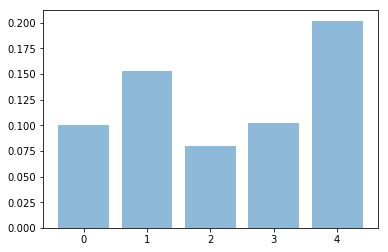

In [219]:
plt.bar(y_pos,conversion_rate,align = 'center',alpha = 0.5)

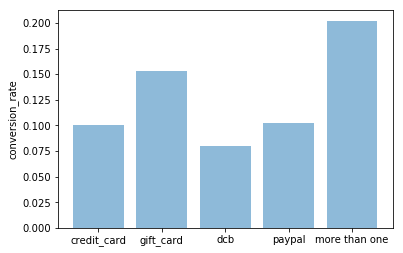

In [220]:
plt.bar(y_pos,conversion_rate,align = 'center',alpha = 0.5)
plt.xticks(y_pos,payment_method)
plt.ylabel('conversion_rate')

In [221]:
sum(my_data.clicked_buy_before==1)

127767

In [222]:
sum(my_data.made_purchase_before==1)

104643

In [223]:
float(104643)/float(127767)

0.8190142994669986

In [224]:
new = my_data[['spend_usd_next_14_days','user_added_credit_card','user_added_dcb','user_added_fop','user_added_gift_card','user_added_paypal','clicked_buy_before==1','made_purchase_before']]

KeyError: "['clicked_buy_before==1'] not in index"

In [225]:
new = my_data[['spend_usd_next_14_days','user_added_credit_card','user_added_dcb','user_added_fop','user_added_gift_card','user_added_paypal','clicked_buy_before','made_purchase_before']]

In [226]:
new = new[new.clicked_buy_before==1&new.made_purchase_before!=1]

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [227]:
new = new[new.clicked_buy_before>1&new.made_purchase_before<1]

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [228]:
new = new[new.clicked_buy_before>0&new.made_purchase_before<1]

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [229]:
new = new[new.clicked_buy_before>0]

In [230]:
new = new[new.made_purchase_before<1]

In [231]:
new

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,clicked_buy_before,made_purchase_before
15,NaN,0.0,1.0,1,0.0,0.0,1.0,0.0
54,1.083211,0.0,1.0,1,0.0,0.0,1.0,0.0
61,NaN,0.0,1.0,1,0.0,0.0,1.0,0.0
83,NaN,0.0,1.0,1,1.0,0.0,1.0,0.0
98,NaN,1.0,0.0,1,0.0,0.0,1.0,0.0
143,NaN,0.0,0.0,1,0.0,1.0,1.0,0.0
157,NaN,NaN,NaN,0,NaN,NaN,1.0,0.0
166,NaN,0.0,1.0,1,0.0,0.0,1.0,0.0
201,NaN,1.0,0.0,1,0.0,0.0,1.0,0.0
241,NaN,0.0,1.0,1,0.0,0.0,1.0,0.0


In [232]:
new_cc=new[(new.user_added_credit_card==1)&(new.user_added_dcb<1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)]
new_gc=new[(new.user_added_credit_card<1)&(new.user_added_dcb<1)&(new.user_added_gift_card==1)&(new.user_added_paypal<1)]
new_dcb=new[(new.user_added_credit_card<1)&(new.user_added_dcb==1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)]
new_pp=new[(new.user_added_credit_card<1)&(new.user_added_dcb<1)&(new.user_added_gift_card<1)&(new.user_added_paypal==1)]
new_mto = new[new.user_added_credit_card+new.user_added_dcb+new.user_added_gift_card+new.user_added_paypal>1]

In [233]:
cr_mto = float(sum(new_mto.spend_usd_next_14_days>0))/float(new_mto['made_purchase_before'].count())
cr_cc = float(sum(new_cc.spend_usd_next_14_days>0))/float(new_cc['made_purchase_before'].count())
cr_gc = float(sum(new_gc.spend_usd_next_14_days>0))/float(new_gc['made_purchase_before'].count())
cr_dcb = float(sum(new_dcb.spend_usd_next_14_days>0))/float(new_dcb['made_purchase_before'].count())
cr_pp = float(sum(new_pp.spend_usd_next_14_days>0))/float(new_pp['made_purchase_before'].count())

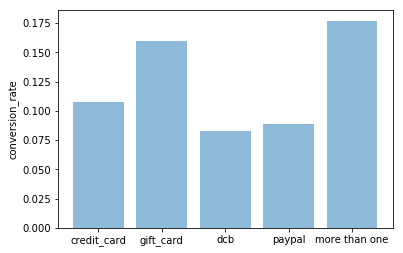

In [234]:
payment_method = ['credit_card','gift_card','dcb','paypal','more than one']
conversion_rate = [cr_cc,cr_gc,cr_dcb,cr_pp,cr_mto]
plt.bar(y_pos,conversion_rate,align = 'center',alpha = 0.5)
plt.xticks(y_pos,payment_method)
plt.ylabel('conversion_rate')

In [235]:
new_mto

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,clicked_buy_before,made_purchase_before
83,NaN,0.0,1.0,1,1.0,0.0,1.0,0.0
307,NaN,1.0,0.0,1,0.0,1.0,1.0,0.0
623,NaN,1.0,0.0,1,1.0,0.0,1.0,0.0
974,NaN,1.0,0.0,1,0.0,1.0,1.0,0.0
1167,NaN,1.0,1.0,1,0.0,0.0,1.0,0.0
1409,NaN,1.0,1.0,1,0.0,0.0,1.0,0.0
1677,NaN,1.0,1.0,1,0.0,0.0,1.0,0.0
1783,1.069715,1.0,1.0,1,1.0,0.0,1.0,0.0
1870,NaN,1.0,1.0,1,0.0,0.0,1.0,0.0
2000,NaN,0.0,1.0,1,1.0,1.0,1.0,0.0


In [236]:
cr_mto

0.17697729052466718

In [237]:
mto_cc = new_mto[new_mto.user_added_credit_card==1]

In [238]:
mto_cc.shape

(2209, 8)

In [239]:
sum(mto_cc.spend_usd_next_14_days>0)

380

In [240]:
mto_cc_cr = float(sum(mto_cc.spend_usd_next_14_days>0))/float(mto_cc['clicked_buy_before'].count())

In [241]:
mto_gf = new_mto[new_mto.user_added_gift_card==1]
mto_gf_cr = float(sum(mto_gf.spend_usd_next_14_days>0))/float(mto_gf['clicked_buy_before'].count())

In [242]:
mto_dcb = new_mto[new_mto.user_added_dcb==1]
mto_dcb_cr = float(sum(mto_dcb.spend_usd_next_14_days>0))/float(mto_dcb['clicked_buy_before'].count())

In [243]:
mto_pp = new_mto[new_mto.user_added_paypal==1]
mto_pp_cr = float(sum(mto_pp.spend_usd_next_14_days>0))/float(mto_pp['clicked_buy_before'].count())

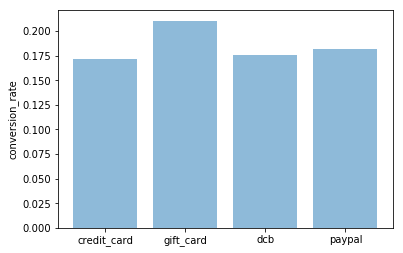

In [245]:
payment_m= ['credit_card','gift_card','dcb','paypal']
y_pos = np.arange(len(payment_m))
conversion_rate = [mto_cc_cr,mto_gf_cr,mto_dcb_cr,mto_pp_cr]
plt.bar(y_pos,conversion_rate,align = 'center',alpha = 0.5)
plt.xticks(y_pos,payment_m)
plt.ylabel('conversion_rate')

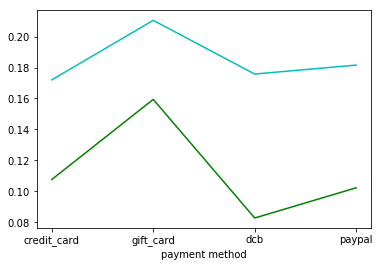

In [251]:
conversion_rate_one = [cr_cc,cr_gc,cr_dcb,cr_paypal]


plt.plot(y_pos, conversion_rate, label='More than one payment method', color='c')
plt.plot(y_pos, conversion_rate_one, label='One payment method', color='g')
plt.xticks(y_pos,payment_m)
plt.xlabel('payment method')

In [252]:
my_data2.head()

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
0,NaN,NaN,12624549,,0.0,3,16554430871838092438,NaN
1,NaN,NaN,12624548,,0.0,14,14411542309984779713,NaN
2,NaN,NaN,12624549,,0.0,20,8425202140671508556,NaN
3,NaN,NaN,12624549,,0.0,16,11302731652742770675,NaN
4,NaN,NaN,12624549,,0.0,14,1399243101040681867,NaN


In [253]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [254]:
experiment = my_data2[my_data2.experiment_id == 12624548]
control = my_data2[my_data2.experiment_id == 12624549]

In [257]:
expbar = experiment.mean()
expvar = experiment.var(ddof=1)
nexp = experiment.size
expdof = float(nexp - 1)
conbar = control.mean()
convar = control.var(ddof=1)
ncon = control.size
condof = float(ncon - 1)

In [258]:
t2, p2 = ttest_ind_from_stats(expbar, np.sqrt(expvar), nexp,
                              conbar, np.sqrt(convar), ncon,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

TypeError: float argument required, not Series

In [259]:
t, p = ttest_ind(experiment, control, equal_var=False)

/Users/rongyi/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [260]:
experiment

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
1,NaN,NaN,12624548,,0.000000,14,14411542309984779713,NaN
6,NaN,NaN,12624548,,0.000000,6,7166579328573822561,NaN
8,NaN,NaN,12624548,,0.000000,4,7069403635541604873,NaN
11,NaN,NaN,12624548,,0.000000,8,6137467593499280663,NaN
16,ID,2017-04-02,12624548,6150947317170565689,0.975841,9,12694082849855316689,GAMES
17,ID,2017-04-02,12624548,14655009389327646207,2.868148,9,12694082849855316689,GAMES
19,JP,2017-04-06,12624548,12543741064946064489,26.174415,4,10988135320952010206,GAMES
20,JP,2017-04-04,12624548,3013104460092423921,1.084750,4,10988135320952010206,GAMES
21,NaN,NaN,12624548,,0.000000,9,2110504725244908498,NaN
22,NaN,NaN,12624548,,0.000000,1,10715423330132361769,NaN


In [261]:
t, p = ttest_ind(experiment.spend_usd, control.spend_usd, equal_var=False)

In [262]:
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 2.88089  p = 0.00396728


In [263]:
expbar = experiment.spend_usd.mean()
expvar = experiment.spend_usd.var(ddof=1)
nexp = experiment.spend_usd.size
expdof = float(nexp - 1)
conbar = control.spend_usd.mean()
convar = control.spend_usd.var(ddof=1)
ncon = control.spend_usd.size
condof = float(ncon - 1)

In [264]:
t2, p2 = ttest_ind_from_stats(expbar, np.sqrt(expvar), nexp,
                              conbar, np.sqrt(convar), ncon,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

ttest_ind_from_stats: t = 2.88089  p = 0.00396728


In [ ]:
# function 1: for any given experiment_id, return a list group by date
def GetSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    return(series)

# function 2: for any two series, plot the time series
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    #plt.gcf().autofmt_xdate()

# master function: 
def PrintDailyTimeSeries(my_data, experiment_ids):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(my_data, experiment_ids[0])
    control_series = GetSeries(my_data, experiment_ids[1])
    
    PlotSeries(treatment_series, control_series)